# Using the same code as before, please solve the following exercises
    3. Play around with the learning rate. Values like 0.0001, 0.001, 0.1, 1 are all interesting to observe. 
       
Useful tip: When you change something, don't forget to RERUN all cells. This can be done easily by clicking:
Kernel -> Restart & Run All

If you don't do that, your algorithm will keep the OLD values of all parameters.

## Solution

Find the piece of code that chooses the optimization algorithm. Change the learning_rate argument to 0.1

Here are some takeaways:
1. It takes the algorithm the same time to finish working.
2. The loss DIVERGES TO INFINITY.
3. The weights and biases are completely random and extremely big (although you can't see that).
4. More iterations would not solve the issue, as the loss is not converging.
5. The problem IS NOT SOLVED.
6. The final graph looks like a 45-degree line, but look at the axes -> it is not.

### Import the relevant libraries

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

C:\Users\iolley2\Anaconda3\envs\py3-TF1\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\iolley2\Anaconda3\envs\py3-TF1\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\iolley2\Anaconda3\envs\py3-TF1\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\iolley2\Anaconda3\envs\py3-TF1\lib\site-packages\ten

### Data generation

We generate data using the exact same logic and code as the example from the previous notebook. The only difference now is that we save it to an npz file. Npz is numpy's file type which allows you to save numpy arrays into a single .npz file. We introduce this change because in machine learning most often: 

* you are given some data (csv, database, etc.)
* you preprocess it into a desired format (later on we will see methods for preprocesing)
* you save it into npz files (if you're working in Python) to access later

Nothing to worry about - this is literally saving your NumPy arrays into a file that you can later access, nothing more.

In [2]:

observations = 1000

xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

generated_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1, 1, (observations,1))

generated_targets = 2*xs - 3*zs + 5 + noise

np.savez('TF_intro', inputs=generated_inputs, targets=generated_targets)

## Solving with TensorFlow

<i/>Note: This intro is just the basics of TensorFlow which has way more capabilities and depth than that.<i>

In [3]:

input_size = 2
output_size = 1

### Outlining the model

In [5]:

inputs = tf.compat.v1.placeholder(tf.float32, [None, input_size])
targets = tf.compat.v1.placeholder(tf.float32, [None, output_size])


weights = tf.compat.v1.Variable(tf.random.uniform([input_size, output_size], minval=-0.1, maxval=0.1))
biases = tf.compat.v1.Variable(tf.random.uniform([output_size], minval=-0.1, maxval=0.1))


outputs = tf.matmul(inputs, weights) + biases

### Choosing the objective function and the optimization method

In [6]:

mean_loss = tf.compat.v1.losses.mean_squared_error(labels=targets, predictions=outputs) / 2.


optimize = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.1).minimize(mean_loss)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


### Prepare for execution

In [7]:

sess = tf.compat.v1.InteractiveSession()

### Initializing variables

In [8]:

initializer = tf.compat.v1.global_variables_initializer()

sess.run(initializer)

### Loading training data

In [9]:

training_data = np.load('TF_intro.npz')

### Learning

In [10]:

for i in range(100):
    
    _, curr_loss = sess.run([optimize, mean_loss], 
        feed_dict={inputs: training_data['inputs'], targets: training_data['targets']})
    
    
    print(curr_loss)

229.73456
1235.25
6925.619
39074.617
220675.62
1246525.2
7041802.0
39782620.0
224763890.0
1269934600.0
7175551000.0
40545882000.0
229115500000.0
1294723000000.0
7316653000000.0
41348560000000.0
233678800000000.0
1320651400000000.0
7463910700000000.0
4.218453e+16
2.3842247e+17
1.3475602e+18
7.6165034e+18
4.3049566e+19
2.4332523e+20
1.3753405e+21
7.7738784e+21
4.39409e+22
2.4837278e+23
1.4039197e+24
7.935666e+24
4.485672e+25
2.5355588e+26
1.4332512e+27
8.101642e+27
4.579579e+28
2.5886893e+29
1.4633075e+30
8.2716645e+30
4.6757527e+31
2.6430863e+32
1.494074e+33
8.4456677e+33
4.7741554e+34
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
nan


### Plotting the data

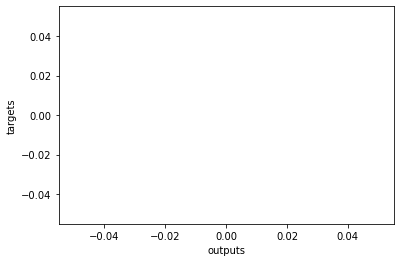

In [11]:

out = sess.run([outputs], 
               feed_dict={inputs: training_data['inputs']})
plt.plot(np.squeeze(out), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()